# Funnel Performance Analysis

cohort by first contect date and closed_month

#### Analysis of Conversion Rate

1. Distribution and evolution of conversion rate, conversions volume and conversions rate
2. Evolution of leads generated across channels MoM
3. Evolution of conversion rate across channels MoM
4. Which channel is the most effective in generating leads and converting users?

#### Analysis of Deal Velocity

5. Distribution of deal velocity across cohorts
6. Evolution of deal velocity across cohorts 
7. Distribution of deal velocity across channels
8. Distribution of deal velocity across SRs



In [1]:
#import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from scipy import stats

In [2]:
#load funnel datasets
mql=pd.read_csv('olist_marketing_qualified_leads_dataset.csv', parse_dates=True)
closed_deals=pd.read_csv('olist_closed_deals_dataset.csv', parse_dates=True)

### Join funnel datasets

The two dataframes that are going to be joint are 'mql' containing data regarding marketing qulified leads that reached out to Olist sales reps and 'closed_deals' containg data about the marketing qualified leads that converted.

In [3]:
#joining funnel datasets
funnel = mql.merge(closed_deals, on='mql_id', how='outer')
#check results
funnel.head()

,mql_id,first_contact_date,landing_page_id,origin,seller_id,sdr_id,sr_id,won_date,business_segment,lead_type,lead_behaviour_profile,has_company,has_gtin,average_stock,business_type,declared_product_catalog_size,declared_monthly_revenue
0,dac32acd4db4c29c230538b72f8dd87d,2018-02-01,88740e65d5d6b056e0cda098e1ea6313,social,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,8c18d1de7f67e60dbd64e3c07d7e9d5d,2017-10-20,007f9098284a86ee80ddeb25d53e0af8,paid_search,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,b4bc852d233dfefc5131f593b538befa,2018-03-22,a7982125ff7aa3b2054c6e44f9d28522,organic_search,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6be030b81c75970747525b843c1ef4f8,2018-01-22,d45d558f0daeecf3cccdffe3c59684aa,email,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5420aad7fec3549a85876ba1c529bd84,2018-02-21,b48ec5f3b04e9068441002a19df93c6c,organic_search,2c43fb513632d29b3b58df74816f1b06,a8387c01a09e99ce014107505b92388c,4ef15afb4b2723d8f3d81e51ec7afefe,2018-02-26 19:58:54,pet,online_medium,cat,NaN,NaN,NaN,reseller,NaN,0.0


### Join closed_deal dataset
first contenct date needed to compute deal velocity

In [4]:
closed_deals=closed_deals.merge(mql, on='mql_id')
closed_deals.head()

,mql_id,seller_id,sdr_id,sr_id,won_date,business_segment,lead_type,lead_behaviour_profile,has_company,has_gtin,average_stock,business_type,declared_product_catalog_size,declared_monthly_revenue,first_contact_date,landing_page_id,origin
0,5420aad7fec3549a85876ba1c529bd84,2c43fb513632d29b3b58df74816f1b06,a8387c01a09e99ce014107505b92388c,4ef15afb4b2723d8f3d81e51ec7afefe,2018-02-26 19:58:54,pet,online_medium,cat,NaN,NaN,NaN,reseller,NaN,0.0,2018-02-21,b48ec5f3b04e9068441002a19df93c6c,organic_search
1,a555fb36b9368110ede0f043dfc3b9a0,bbb7d7893a450660432ea6652310ebb7,09285259593c61296eef10c734121d5b,d3d1e91a157ea7f90548eef82f1955e3,2018-05-08 20:17:59,car_accessories,industry,eagle,NaN,NaN,NaN,reseller,NaN,0.0,2018-04-04,2f08471dfb83baef522f952438a36f6e,referral
2,327174d3648a2d047e8940d7d15204ca,612170e34b97004b3ba37eae81836b4c,b90f87164b5f8c2cfa5c8572834dbe3f,6565aa9ce3178a5caf6171827af3a9ba,2018-06-05 17:27:23,home_appliances,online_big,cat,NaN,NaN,NaN,reseller,NaN,0.0,2018-04-03,1ceb590cd1e00c7ee95220971f82693d,organic_search
3,f5fee8f7da74f4887f5bcae2bafb6dd6,21e1781e36faf92725dde4730a88ca0f,56bf83c4bb35763a51c2baab501b4c67,d3d1e91a157ea7f90548eef82f1955e3,2018-01-17 13:51:03,food_drink,online_small,NaN,NaN,NaN,NaN,reseller,NaN,0.0,2018-01-14,22c29808c4f815213303f8933030604c,paid_search
4,ffe640179b554e295c167a2f6be528e0,ed8cb7b190ceb6067227478e48cf8dde,4b339f9567d060bcea4f5136b9f5949e,d3d1e91a157ea7f90548eef82f1955e3,2018-07-03 20:17:45,home_appliances,industry,wolf,NaN,NaN,NaN,manufacturer,NaN,0.0,2017-10-09,a0fbc0263cb98bdb0d72b9f9f283a172,unknown


### Creating plotting function for variable distribution

In [5]:
#define plot_distribution_subplot
def plot_distribution_subplot(data, title, axlabel, ax):
    plt.figure(figsize=(12,6))
    sns.distplot(data, axlabel=axlabel,ax=ax)
    ax.axvline(data.mean(), c='green', ymax=0.95)
    ax.axvline(data.median(), c='orange', ymax=0.95)
    ax.axvline(data.describe()[4], c='yellow', ymax=0.95)
    ax.axvline(data.describe()[6], c='red', ymax=0.95)
    ax.set_title(title)
    ax.legend(labels=['mean', 'median', '1st quartile', '3rd quartile'])
    return

### Create variable 'converted'

In [6]:
#creating variable 'converted' to establish which leads converted
funnel['converted']=funnel['seller_id'].apply(lambda x: 'No' if pd.isnull(x) else 'Yes')
#check results
funnel.head()

,mql_id,first_contact_date,landing_page_id,origin,seller_id,sdr_id,sr_id,won_date,business_segment,lead_type,lead_behaviour_profile,has_company,has_gtin,average_stock,business_type,declared_product_catalog_size,declared_monthly_revenue,converted
0,dac32acd4db4c29c230538b72f8dd87d,2018-02-01,88740e65d5d6b056e0cda098e1ea6313,social,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
1,8c18d1de7f67e60dbd64e3c07d7e9d5d,2017-10-20,007f9098284a86ee80ddeb25d53e0af8,paid_search,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
2,b4bc852d233dfefc5131f593b538befa,2018-03-22,a7982125ff7aa3b2054c6e44f9d28522,organic_search,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
3,6be030b81c75970747525b843c1ef4f8,2018-01-22,d45d558f0daeecf3cccdffe3c59684aa,email,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
4,5420aad7fec3549a85876ba1c529bd84,2018-02-21,b48ec5f3b04e9068441002a19df93c6c,organic_search,2c43fb513632d29b3b58df74816f1b06,a8387c01a09e99ce014107505b92388c,4ef15afb4b2723d8f3d81e51ec7afefe,2018-02-26 19:58:54,pet,online_medium,cat,NaN,NaN,NaN,reseller,NaN,0.0,Yes


In [7]:
#selecting columns
funnel=funnel[['mql_id','first_contact_date','origin','converted']]
#check results
funnel.head()

,mql_id,first_contact_date,origin,converted
0,dac32acd4db4c29c230538b72f8dd87d,2018-02-01,social,No
1,8c18d1de7f67e60dbd64e3c07d7e9d5d,2017-10-20,paid_search,No
2,b4bc852d233dfefc5131f593b538befa,2018-03-22,organic_search,No
3,6be030b81c75970747525b843c1ef4f8,2018-01-22,email,No
4,5420aad7fec3549a85876ba1c529bd84,2018-02-21,organic_search,Yes


### Data Assessing & Cleaning

In [8]:
funnel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8000 entries, 0 to 7999
Data columns (total 4 columns):
mql_id                8000 non-null object
first_contact_date    8000 non-null object
origin                7940 non-null object
converted             8000 non-null object
dtypes: object(4)
memory usage: 312.5+ KB


In [9]:
#check duplicates
funnel.duplicated().any()

False

### Data Cleaning Issues:

 1. **first_contact_date** is an object and not datetime: convert 'first_contact_date' to datetime.
 
 2. **origin** has 60 missing values: change NaN to 'unknown'.

In [10]:
# 1. convert 'first_contact_date' to datetime
funnel['first_contact_date']=pd.to_datetime(funnel['first_contact_date'])
#check results
funnel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8000 entries, 0 to 7999
Data columns (total 4 columns):
mql_id                8000 non-null object
first_contact_date    8000 non-null datetime64[ns]
origin                7940 non-null object
converted             8000 non-null object
dtypes: datetime64[ns](1), object(3)
memory usage: 312.5+ KB


In [11]:
# 2. change NaN to 'unknown'
funnel['origin'].fillna('unknown', inplace=True)
#check results
funnel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8000 entries, 0 to 7999
Data columns (total 4 columns):
mql_id                8000 non-null object
first_contact_date    8000 non-null datetime64[ns]
origin                8000 non-null object
converted             8000 non-null object
dtypes: datetime64[ns](1), object(3)
memory usage: 312.5+ KB


### 1. Distribution and evolution of conversion rate, conversions volume and conversions rate

In [12]:
#define funnel_ts in order to resample data (datetime index is needed)
funnel_ts=funnel.set_index('first_contact_date')

In [13]:
#get montlhy conversion rate
monthly_conv_rate=(funnel_ts.resample('M')['converted'].value_counts(normalize=True).unstack().fillna(0))*100

In [14]:
#get montlhy conversion volume
monthly_conv_vol=funnel_ts.resample('M')['converted'].value_counts().unstack().fillna(0)

In [15]:
#get monthly leads volume
monthly_leads_vol=funnel_ts.resample('M')['mql_id'].count().rename('leads_vol').to_frame()

C:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0, 0.5, 'Leads Volume')

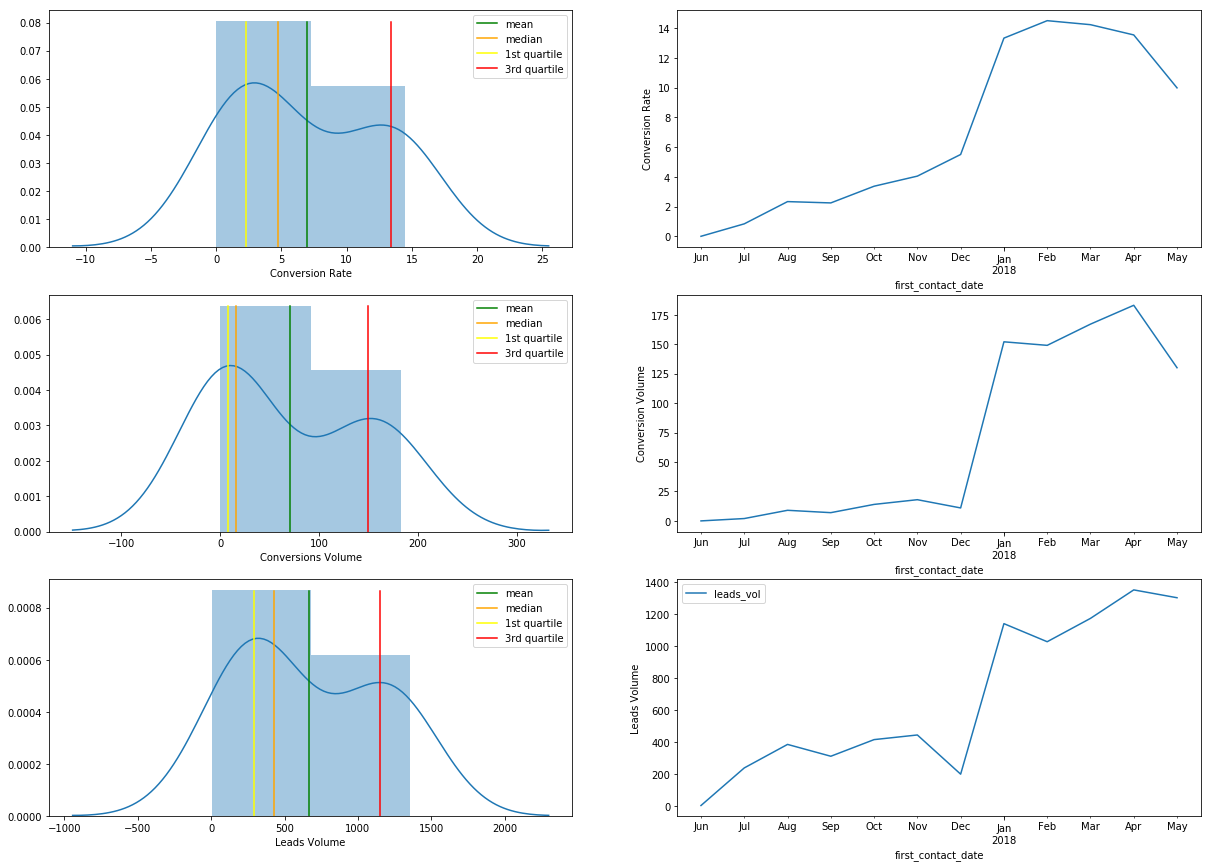

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

In [16]:
#plot
fig=plt.figure(figsize=(20,8))

plt.subplots_adjust(left=0.1, right=0.9, bottom=-0.5, top=0.9)

ax1=fig.add_subplot(3,2,1)
ax2=fig.add_subplot(3,2,2)
ax3=fig.add_subplot(3,2,3)
ax4=fig.add_subplot(3,2,4)
ax5=fig.add_subplot(3,2,5)
ax6=fig.add_subplot(3,2,6)

plot_distribution_subplot(monthly_conv_rate.Yes, None, 'Conversion Rate',ax1)
monthly_conv_rate.Yes.plot(ax=ax2).set_ylabel('Conversion Rate')
plot_distribution_subplot(monthly_conv_vol.Yes, None, 'Conversions Volume',ax3)
monthly_conv_vol.Yes.plot(ax=ax4).set_ylabel('Conversion Volume')
plot_distribution_subplot(monthly_leads_vol.leads_vol, None, 'Leads Volume',ax5)
monthly_leads_vol.plot(ax=ax6).set_ylabel('Leads Volume')

Despite a drop in leads volume and conversions volume happened in December 2017, the conversion rate grew steadily. Although less leads reached out to the company, the company incresed its effevtivness in converting leads.

The distributions of the three variables are very similar, rightly skewed and two pikes, this suggests that they might be correlated.

The most interesting relation to look into is between conversion rate and leads volume. The relation between leads volume and conversions volume, to parity of conversion rate, is quite obvious. 

This does not mean that the volume of leads directly affects the conversion rate. 

The factors that influnce the conversion are the willingness of the lead to become customer and the performance of the SDR/SR. Having a large pool of leads certaninly helps in increasing conversions but the conversion rate is mostly influenced by the performance of the sales team and the quality of the product.

The overall increase of the conversion rate could have been driven by:

- Improved quality of product. As the number of customers increased the company could have collected more feedback and translated it into a better product.
- Increased pool of leads led the sales team to have more insights on leads behaviour, translating them into more effective negotiations.
- Sales team became more structured.

### 2. Evolution of leads generated across channels MoM

In [17]:
# 1. Create cohorts based on first contact date to then aggregate data
#set index mql_id to 
funnel.set_index('mql_id', inplace=True)
#create cohort label based in first contact date
funnel['cohort_group'] = funnel.groupby(level=0)['first_contact_date'].min().apply(lambda x: x.strftime('%Y-%m'))
funnel.reset_index(inplace=True)
funnel.head()

,mql_id,first_contact_date,origin,converted,cohort_group
0,dac32acd4db4c29c230538b72f8dd87d,2018-02-01,social,No,2018-02
1,8c18d1de7f67e60dbd64e3c07d7e9d5d,2017-10-20,paid_search,No,2017-10
2,b4bc852d233dfefc5131f593b538befa,2018-03-22,organic_search,No,2018-03
3,6be030b81c75970747525b843c1ef4f8,2018-01-22,email,No,2018-01
4,5420aad7fec3549a85876ba1c529bd84,2018-02-21,organic_search,Yes,2018-02


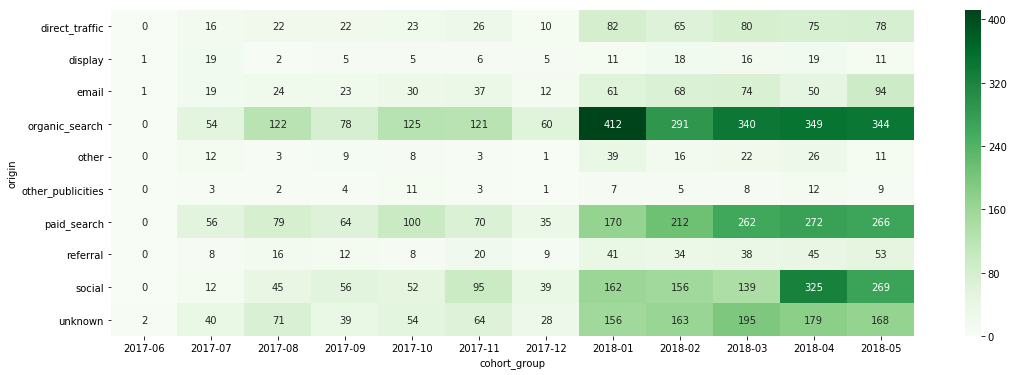

In [18]:
plt.figure(figsize=(18,6))
sns.heatmap(pd.crosstab(funnel.origin, funnel.cohort_group), cmap='Greens', annot=True, fmt='g')

### 3. Evolution of conversion rate across channel MoM

In [19]:
channel_convrate_ev=funnel.groupby(['cohort_group','origin'])['converted'].value_counts(normalize=True).unstack().Yes.unstack().transpose()

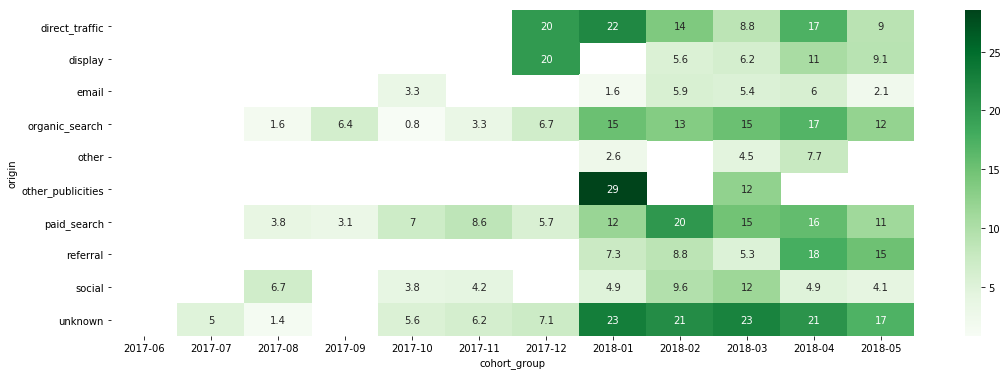

In [20]:
plt.figure(figsize=(18,6))
sns.heatmap(channel_convrate_ev*100, cmap='Greens', annot=True)

### 4. Which channel is the most effective in generating leads and converting users?

In [21]:
#get conversions volume by channel
conv_vol_channel=pd.crosstab(funnel.origin, funnel.converted).Yes.sort_values(ascending=False)

In [22]:
#get conversion rate by channel
conv_rate_channel=(pd.crosstab(funnel.origin, funnel.converted, normalize='index').Yes.sort_values(ascending=False))*100

In [23]:
#get leads volume by channel
leads_vol_channel=funnel['origin'].value_counts().sort_values(ascending=False)

In [24]:
channel_df=leads_vol_channel.rename('leads_vol').to_frame().merge(conv_rate_channel.rename('conversion_rate').to_frame(),right_index=True, left_index=True).merge(conv_vol_channel.rename('conv_vol').to_frame(),right_index=True, left_index=True)
channel_df

,leads_vol,conversion_rate,conv_vol
organic_search,2296,11.803136,271
paid_search,1586,12.295082,195
social,1350,5.555556,75
unknown,1159,16.652286,193
direct_traffic,499,11.222445,56
email,493,3.042596,15
referral,284,8.450704,24
other,150,2.666667,4
display,118,5.084746,6
other_publicities,65,4.615385,3


In [25]:
#create col 'channel' for legend
channel_df['channel']=channel_df.index
channel_df.sort_values(by='conv_vol', ascending=False)
channel_df

,leads_vol,conversion_rate,conv_vol,channel
organic_search,2296,11.803136,271,organic_search
paid_search,1586,12.295082,195,paid_search
social,1350,5.555556,75,social
unknown,1159,16.652286,193,unknown
direct_traffic,499,11.222445,56,direct_traffic
email,493,3.042596,15,email
referral,284,8.450704,24,referral
other,150,2.666667,4,other
display,118,5.084746,6,display
other_publicities,65,4.615385,3,other_publicities


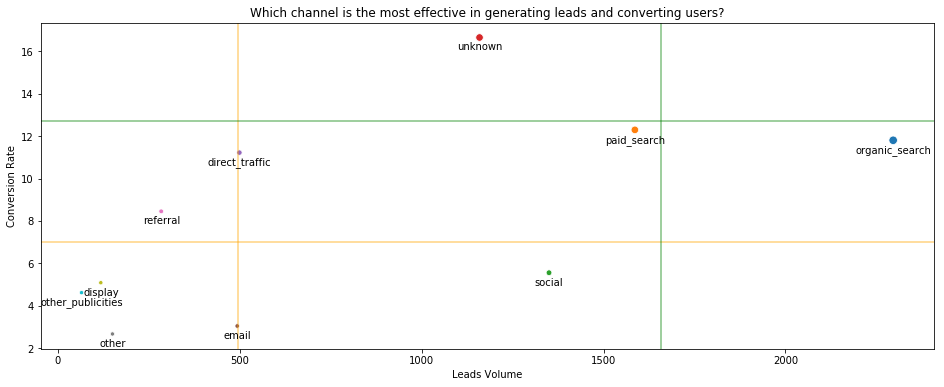

In [26]:
#plot
plt.figure(figsize=(16,6))
plot=sns.scatterplot(x=channel_df.leads_vol, y=channel_df.conversion_rate, size=channel_df.conv_vol/channel_df.conv_vol.sum(), hue=channel_df.channel, legend=False)

plt.title('Which channel is the most effective in generating leads and converting users?')
plt.ylabel('Conversion Rate')
plt.xlabel('Leads Volume')

for line in range(0,channel_df.shape[0]):
     plot.text(channel_df.leads_vol[line]+0.2, channel_df.conversion_rate[line]-0.2, 
               channel_df.channel[line], 
               horizontalalignment='center', verticalalignment='top', color='black')
        
plt.axhline(channel_df.conversion_rate.median(), color='orange', alpha=0.5)
plt.axvline(channel_df.leads_vol.median(), color='orange', alpha=0.5)

plt.axhline(channel_df.conversion_rate.quantile(0.9), color='green', alpha=0.5)
plt.axvline(channel_df.leads_vol.quantile(0.9), color='green', alpha=0.5)

- The 10.5% of the users converted over the period under examination. The monthly average conversion rate is 6.98%, the median is 4.77%. The conversion rate consistently grew until February 2018, the overall percent change of the conversion rate is 1092.24% during the period under observation.
- Despite a drop in leads volume and conversions volume happened in December 2017, the conversion rate grew steadily. Although less leads reached out to the company, the company incresed its effevtivness in converting leads.
- The most effective channel in converting users (ignoring unkown) is paid search (12.3% conversion rate), the second one is organic search (11.8%) and the third is direct traffic (11.22%).
- Despite being slightly less effective than paid search, organic search converted more users, 271 versus 195, and attracted more leads, 2296 versus 1586.
- Social positions as third most effective channel to attract leads but presents quite a low conversion rate (5.55%). 
- Direct traffic is quite effective in converting users, but the ability to attract leads and the volume of conversions is not as attractive as paid and organic search.
- The monthly conversion rate is strongly correlated with the monthly leads volume. The correlation between conversion rate and conversions volume weakens if the analysis is performed across channels instead of comparing monthly metrics. In general conversion rate could depend on the volume of leads that reached out to the company, but when the data is grouped by channel, the idiosyncracities of each channel take over influencing the relation between the conversion rate and the leads volume.
- The factors that influnce the conversion are the willingness of the lead to become customer and the performance of the SDR/SR. Having a large pool of leads certaninly helps in increasing conversions but the conversion rate is mostly influenced by the performance of the sales team and the quality of the product. The overall increase of the conversion rate could have been driven by:
     - Improved quality of product. As the number of customers increased the company could have collected more feedback and translated it into a better product.
     - Increased pool of leads led the sales team to have more insights on leads behaviour, translating them into more effective negotiations.
     - Sales team became more structured.






### Limitations

- There is no complete view in the overall marketing funnel, for instance additional data that could have produce a more extensive analyisis would be:
    - Amount of impressions for paid search, social media and ads displayed on websites.
    - Amount of emails sent to potential leads.
- Important economic data are not included such as:
    - Customer acquisition cost across channels.
    - Budget for SEO.

### Closed Deals Analysis

In [27]:
# convert to datetime
closed_deals['won_date']=pd.to_datetime(closed_deals['won_date'])
closed_deals['first_contact_date']=pd.to_datetime(closed_deals['first_contact_date'])

In [28]:
# create variable deal_lenght
closed_deals['deal_lenght']=(closed_deals.won_date-closed_deals.first_contact_date)/np.timedelta64(1,'D')
closed_deals['deal_lenght']=closed_deals['deal_lenght'].astype(int)

In [29]:
# COHORTS ON first_contact_data
#set index mql_id to 
closed_deals.set_index('mql_id', inplace=True)
#create cohort label based in first contact date
closed_deals['cohort_group_first_contact'] = closed_deals.groupby(level=0)['first_contact_date'].min().apply(lambda x: x.strftime('%Y-%m'))
closed_deals.reset_index(inplace=True)
closed_deals.head()

,mql_id,seller_id,sdr_id,sr_id,won_date,business_segment,lead_type,lead_behaviour_profile,has_company,has_gtin,average_stock,business_type,declared_product_catalog_size,declared_monthly_revenue,first_contact_date,landing_page_id,origin,deal_lenght,cohort_group_first_contact
0,5420aad7fec3549a85876ba1c529bd84,2c43fb513632d29b3b58df74816f1b06,a8387c01a09e99ce014107505b92388c,4ef15afb4b2723d8f3d81e51ec7afefe,2018-02-26 19:58:54,pet,online_medium,cat,NaN,NaN,NaN,reseller,NaN,0.0,2018-02-21,b48ec5f3b04e9068441002a19df93c6c,organic_search,5,2018-02
1,a555fb36b9368110ede0f043dfc3b9a0,bbb7d7893a450660432ea6652310ebb7,09285259593c61296eef10c734121d5b,d3d1e91a157ea7f90548eef82f1955e3,2018-05-08 20:17:59,car_accessories,industry,eagle,NaN,NaN,NaN,reseller,NaN,0.0,2018-04-04,2f08471dfb83baef522f952438a36f6e,referral,34,2018-04
2,327174d3648a2d047e8940d7d15204ca,612170e34b97004b3ba37eae81836b4c,b90f87164b5f8c2cfa5c8572834dbe3f,6565aa9ce3178a5caf6171827af3a9ba,2018-06-05 17:27:23,home_appliances,online_big,cat,NaN,NaN,NaN,reseller,NaN,0.0,2018-04-03,1ceb590cd1e00c7ee95220971f82693d,organic_search,63,2018-04
3,f5fee8f7da74f4887f5bcae2bafb6dd6,21e1781e36faf92725dde4730a88ca0f,56bf83c4bb35763a51c2baab501b4c67,d3d1e91a157ea7f90548eef82f1955e3,2018-01-17 13:51:03,food_drink,online_small,NaN,NaN,NaN,NaN,reseller,NaN,0.0,2018-01-14,22c29808c4f815213303f8933030604c,paid_search,3,2018-01
4,ffe640179b554e295c167a2f6be528e0,ed8cb7b190ceb6067227478e48cf8dde,4b339f9567d060bcea4f5136b9f5949e,d3d1e91a157ea7f90548eef82f1955e3,2018-07-03 20:17:45,home_appliances,industry,wolf,NaN,NaN,NaN,manufacturer,NaN,0.0,2017-10-09,a0fbc0263cb98bdb0d72b9f9f283a172,unknown,267,2017-10


In [30]:
# COHORTS ON won_date
#set index mql_id to 
closed_deals.set_index('mql_id', inplace=True)
#create cohort label based in first contact date
closed_deals['cohort_group_won_date'] = closed_deals.groupby(level=0)['won_date'].min().apply(lambda x: x.strftime('%Y-%m'))
closed_deals.reset_index(inplace=True)
closed_deals.head()

,mql_id,seller_id,sdr_id,sr_id,won_date,business_segment,lead_type,lead_behaviour_profile,has_company,has_gtin,average_stock,business_type,declared_product_catalog_size,declared_monthly_revenue,first_contact_date,landing_page_id,origin,deal_lenght,cohort_group_first_contact,cohort_group_won_date
0,5420aad7fec3549a85876ba1c529bd84,2c43fb513632d29b3b58df74816f1b06,a8387c01a09e99ce014107505b92388c,4ef15afb4b2723d8f3d81e51ec7afefe,2018-02-26 19:58:54,pet,online_medium,cat,NaN,NaN,NaN,reseller,NaN,0.0,2018-02-21,b48ec5f3b04e9068441002a19df93c6c,organic_search,5,2018-02,2018-02
1,a555fb36b9368110ede0f043dfc3b9a0,bbb7d7893a450660432ea6652310ebb7,09285259593c61296eef10c734121d5b,d3d1e91a157ea7f90548eef82f1955e3,2018-05-08 20:17:59,car_accessories,industry,eagle,NaN,NaN,NaN,reseller,NaN,0.0,2018-04-04,2f08471dfb83baef522f952438a36f6e,referral,34,2018-04,2018-05
2,327174d3648a2d047e8940d7d15204ca,612170e34b97004b3ba37eae81836b4c,b90f87164b5f8c2cfa5c8572834dbe3f,6565aa9ce3178a5caf6171827af3a9ba,2018-06-05 17:27:23,home_appliances,online_big,cat,NaN,NaN,NaN,reseller,NaN,0.0,2018-04-03,1ceb590cd1e00c7ee95220971f82693d,organic_search,63,2018-04,2018-06
3,f5fee8f7da74f4887f5bcae2bafb6dd6,21e1781e36faf92725dde4730a88ca0f,56bf83c4bb35763a51c2baab501b4c67,d3d1e91a157ea7f90548eef82f1955e3,2018-01-17 13:51:03,food_drink,online_small,NaN,NaN,NaN,NaN,reseller,NaN,0.0,2018-01-14,22c29808c4f815213303f8933030604c,paid_search,3,2018-01,2018-01
4,ffe640179b554e295c167a2f6be528e0,ed8cb7b190ceb6067227478e48cf8dde,4b339f9567d060bcea4f5136b9f5949e,d3d1e91a157ea7f90548eef82f1955e3,2018-07-03 20:17:45,home_appliances,industry,wolf,NaN,NaN,NaN,manufacturer,NaN,0.0,2017-10-09,a0fbc0263cb98bdb0d72b9f9f283a172,unknown,267,2017-10,2018-07


### Distribution of deal velocity across cohorts

In [44]:
closed_deals.groupby('cohort_group_first_contact')['deal_lenght'].describe()

,count,mean,std,min,25%,50%,75%,max
cohort_group_first_contact,,,,,,,,
2017-07,2.0,398.000000,41.012193,369.0,383.5,398.0,412.50,427.0
2017-08,9.0,296.000000,70.927780,141.0,296.0,317.0,335.00,371.0
2017-09,7.0,283.714286,91.107472,130.0,226.5,336.0,347.00,373.0
2017-10,14.0,240.214286,72.897376,107.0,188.5,246.5,306.00,341.0
2017-11,18.0,155.111111,106.727740,14.0,71.0,163.0,222.50,340.0
2017-12,11.0,122.363636,114.057242,4.0,40.5,54.0,189.00,321.0
2018-01,152.0,43.651316,59.239357,0.0,8.0,17.5,50.75,306.0
2018-02,149.0,42.281879,62.316550,0.0,7.0,16.0,41.00,260.0
2018-03,167.0,37.616766,53.702072,-1.0,6.0,12.0,41.00,210.0


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

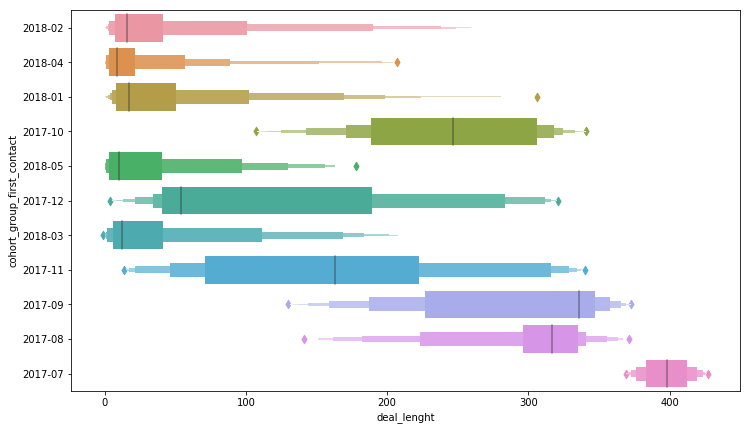

In [43]:
#order cohorts
plt.figure(figsize=(12,7))
sns.boxenplot(y=closed_deals.cohort_group_first_contact, x=closed_deals.deal_lenght)

### Deal lenght by cohort

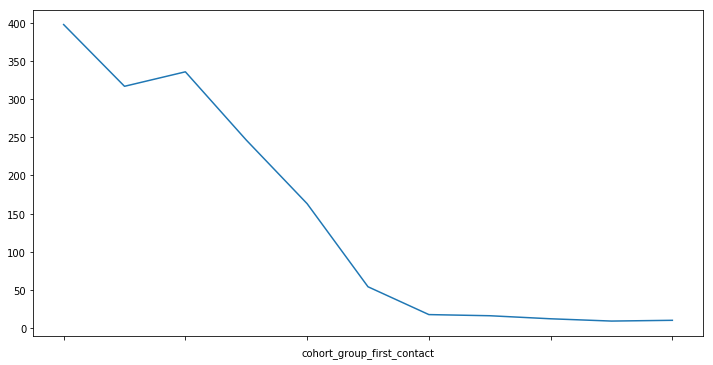

In [32]:
closed_deals.groupby('cohort_group_first_contact')['deal_lenght'].median().plot(figsize=(12,6))

In [33]:
pd.pivot_table(closed_deals, index='cohort_group_first_contact', columns='cohort_group_won_date', values='deal_lenght', aggfunc=np.median)

cohort_group_won_date,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11
cohort_group_first_contact,,,,,,,,,,,,
2017-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,369.0,NaN,427.0,NaN,NaN
2017-08,NaN,141.0,NaN,NaN,223.0,NaN,314.5,335.0,356.0,NaN,NaN,NaN
2017-09,NaN,130.0,NaN,NaN,206.0,247.0,NaN,NaN,341.0,NaN,373.0,NaN
2017-10,NaN,NaN,107.0,151.0,189.0,226.0,NaN,267.0,306.0,321.0,341.0,NaN
2017-11,17.0,64.0,87.0,NaN,168.0,179.0,NaN,237.0,254.0,NaN,329.0,NaN
2017-12,4.0,40.0,48.5,NaN,NaN,144.5,NaN,216.0,NaN,NaN,306.0,321.0
2018-01,NaN,7.0,20.0,54.0,85.0,116.0,148.0,191.0,210.0,228.0,292.0,306.0
2018-02,NaN,NaN,6.0,19.0,55.0,88.0,130.0,153.0,199.0,207.5,246.5,260.0
2018-03,NaN,NaN,NaN,6.0,21.0,57.0,97.0,116.5,159.0,183.0,206.5,NaN


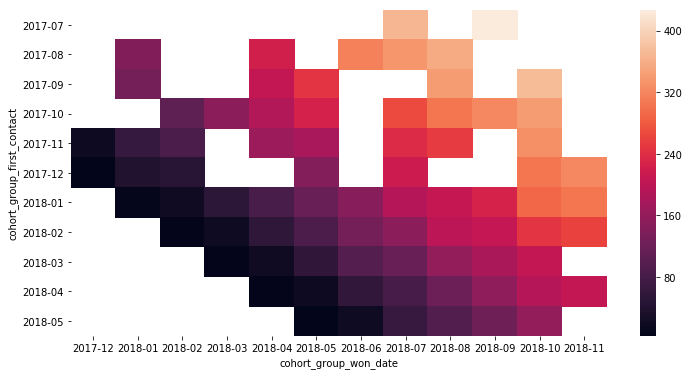

In [34]:
plt.figure(figsize=(12,6))
sns.heatmap(pd.pivot_table(closed_deals, index='cohort_group_first_contact', columns='cohort_group_won_date', values='deal_lenght', aggfunc=np.median))

### Deal velocity across channels

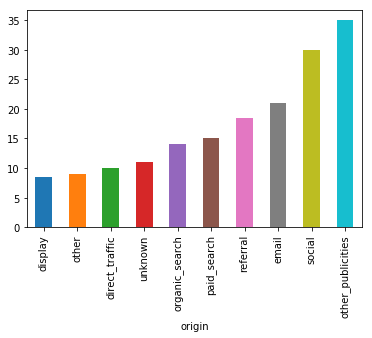

In [51]:
closed_deals.groupby('origin')['deal_lenght'].median().sort_values(ascending=True).plot(kind='bar')